# HCN channels: sag

#### **Basic instructions:**
#### 1. **To run code cells**, you can either hit the play button to the left of the cell, or you can select the cell and **press shift-enter**.

#### 2. **The first time** you run this code notebook, you might get a popup asking to choose which version of Python to use (the python "kernel"). **Just hit enter** to choose the base/default version.

#### 3. Make sure you data (.abf) files are in the "data" folder here on the left. You can just copy/paste the files over from where they are saved on your computer.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from utils import *
update_plot_defaults()

## 1. Choose the data file you want to analyze

#### Put the .abf files with your Ih recordings in the "data/HCN_channels" folder

In [3]:
data_folder = "data/HCN_channels"

from glob import glob
data_files = glob(data_folder+"/*.abf")
print(data_folder)
data_files

data/HCN_channels


['data/HCN_channels/K_deact_1.abf',
 'data/HCN_channels/K_deact_3.abf',
 'data/HCN_channels/K_deact_2.abf']

Choose which file you want to analyze (copy name from above) and paste the file name here:

In [4]:
data_file = 'data/HCN_channels/K_deact_1.abf'

Now we can load the file and plot the raw data:

Data dimensions (sweeps, channels, timepoints): 
(11, 2, 28500)
sampling freq: 49999.99999999999 Hz


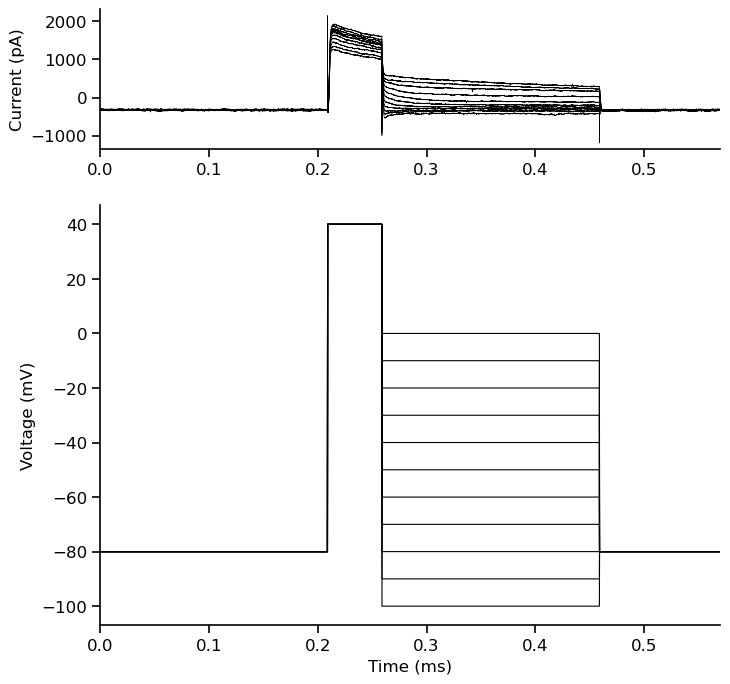

In [5]:
## Extract the sweeps, time and sampling frequency:
sweeps, sweeps_time, sampling_freq = get_sweeps(data_file)

print(f"Data dimensions (sweeps, channels, timepoints): \n{sweeps.shape}")
print(f"sampling freq: {sampling_freq} Hz")

current_traces = sweeps[:, 0, :]
voltage_traces = sweeps[:, 1, :]
ax = plot_traces(sweeps_time, current_traces, voltage_traces, height_ratios=(1,3))
plt.show()

## 2. Select what you want to measure

(If you want to save the images, you can do it by clicking on the save icon in the top-right of the image when you hover over it)

### 2.1. Define the time window for the peak measurement

First we need to measure the peak voltage of the sag potential.

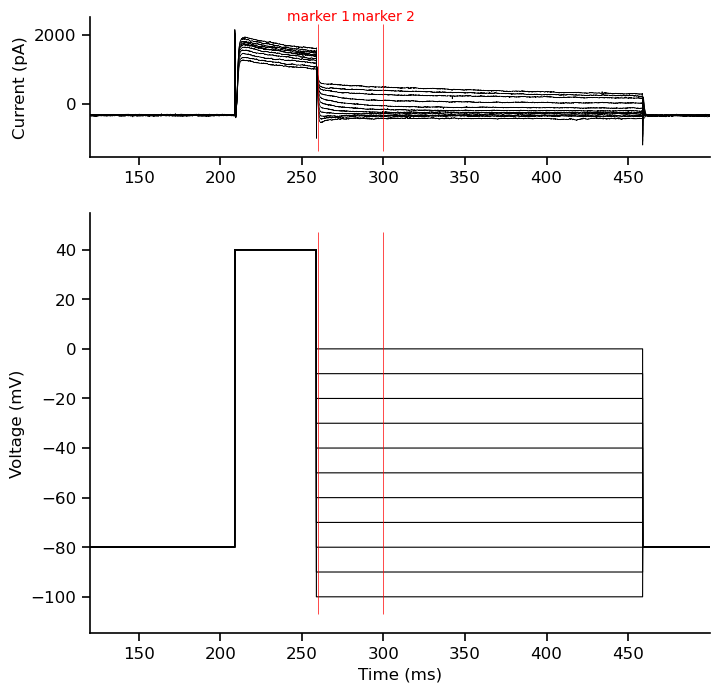

In [25]:
# The start/end time just helps to zoom in on the traces.
start_time = 120  # milliseconds
end_time = 500   # milliseconds, (enter -1 to get the end of the sweep)

# The markers are important: the will define the window where we actually exctract peak current values from. Set them carefully.
marker_1 = 260  # milliseconds
marker_2 = 300    # milliseconds


# ----------------------------------------------------------------------------------------------
current_traces, time_in_window = select_sweep_window(sweeps, sweeps_time, start_time, end_time, sampling_freq, channel=0)
voltage_traces, time_in_window = select_sweep_window(sweeps, sweeps_time, start_time, end_time, sampling_freq, channel=1)
ax = plot_traces(time_in_window, current_traces, voltage_traces, marker_1, marker_2, height_ratios=(1,3))
plt.show()

### 3.2. Measure the peak

Here we will measure at timepoints from the markers we defined above

In [ ]:
measurement_type = 'peak' # Options: 'mean', 'max', 'min', 'peak'

voltage_peak, _ = get_step_measurements(sweeps, sweeps_time, 
                                                     start_time=marker_1,
                                                     end_time=marker_2,
                                                     sampling_freq=sampling_freq,
                                                     measurement_type=measurement_type)
if np.all(voltage_peak == voltage_peak[0]):
    print("WARNING: All voltage steps are the same")

### 3.2. Measure the steady-state voltage

Now we need to define where to measure the steady-state voltage

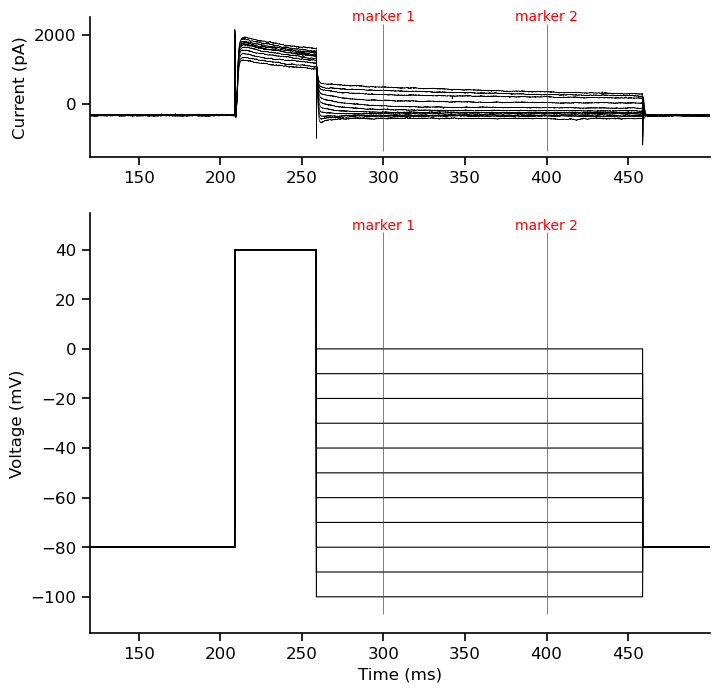

In [28]:
# The start/end time just helps to zoom in on the traces.
start_time = 120  # milliseconds
end_time = 500   # milliseconds, (enter -1 to get the end of the sweep)

# The markers are important: the will define the window where we actually exctract peak current values from. Set them carefully.
marker_3 = 300  # milliseconds
marker_4 = 400    # milliseconds


# ----------------------------------------------------------------------------------------------
current_traces, time_in_window = select_sweep_window(sweeps, sweeps_time, start_time, end_time, sampling_freq, channel=0)
voltage_traces, time_in_window = select_sweep_window(sweeps, sweeps_time, start_time, end_time, sampling_freq, channel=1)
ax = plot_traces(time_in_window, current_traces, voltage_traces, marker_3, marker_4, height_ratios=(1,3))
plt.show()

In [ ]:
measurement_type = 'peak' # Options: 'mean', 'max', 'min', 'peak'

steadystate_voltage, _ = get_step_measurements(sweeps, sweeps_time, 
                                                     start_time=marker_1,
                                                     end_time=marker_2,
                                                     sampling_freq=sampling_freq,
                                                     measurement_type=measurement_type)

if np.all(steadystate_voltage == steadystate_voltage[0]):
    print("WARNING: All voltage steps are the same")

Now we can calculate the voltage sag amplitude for this cell

In [ ]:
voltage_sag = np.abs(voltage_peak - steadystate_voltage)
print(f'Voltage sag: {voltage_sag:.2f} mV')